# Plotting point data
PolarToolkit also supports some plotting of point data (non-gridded). Here we will download a dataset and make a simple plot.

Import the necessary modules

In [1]:
from polartoolkit import fetch, maps, regions

Fetch a pandas dataframe of point measurements of Antarctic geothermal heat flux.

In [2]:
df = fetch.ghf(version="burton-johnson-2020", points=True)
df.describe()

,lat,lon,top (m),GHF,Elevation (m.a.s.l.),x,y
count,446.000000,446.000000,152.000000,445.000000,339.000000,4.460000e+02,4.460000e+02
mean,-65.597642,-15.016791,13.936974,92.180157,-2508.846608,-8.626337e+05,6.308524e+05
std,7.374904,96.977434,41.028407,66.437845,1565.458501,1.865982e+06,1.840237e+06
min,-90.000000,-179.960000,0.000000,-31.000000,-5401.000000,-3.771912e+06,-4.390204e+06
25%,-72.876425,-66.667500,0.000000,54.000000,-3558.500000,-2.486918e+06,-7.412494e+05
50%,-63.395000,-48.456350,1.910000,75.000000,-3122.000000,-1.659718e+06,1.122676e+06
75%,-61.843300,60.120825,6.000000,112.000000,-846.000000,3.824856e+05,2.009383e+06
max,-50.200000,179.966700,260.000000,626.000000,349.000000,4.304154e+06,4.294868e+06


Use `pygmt` to create a colorscale for the points. We want to plot the column `GHF` which ranges from -31 to 626, so well use 50-110 for the limits of the colorscale.

In [3]:
import pygmt

pygmt.makecpt(cmap="inferno", series=[40, 110], background=True, output="ghf.cpt")

Use the `basemap` function to make a figure instance, and add the points to that. 

grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from 100000 to 99766.1470198
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from 1000000 to 1000045.54542
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from -2200000 to -2200065.03982
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from -1000000 to -999825.037242


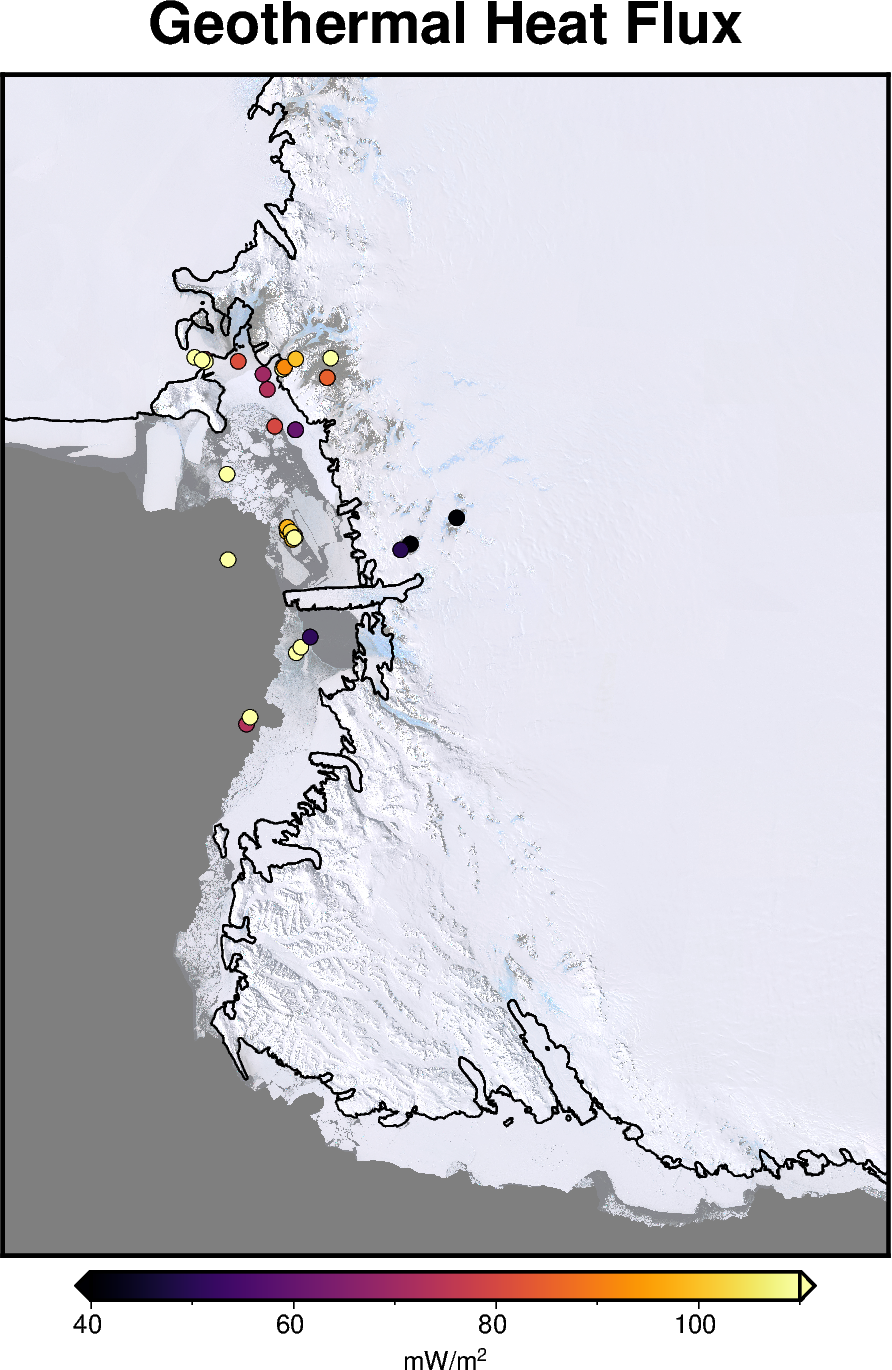

In [4]:
fig = maps.basemap(
    region=regions.victoria_land,
    title="Geothermal Heat Flux",
    imagery_basemap=True,
    transparency=50,
    points=df,
    points_cmap="ghf.cpt",
    points_fill=df.GHF,
    points_pen=".2p,black",
    coast=True,
    hemisphere="south",
    colorbar=True,
    cbar_label="mW/m@+2@+",
)

fig.show(dpi=200)

The functionality of plotting point data is rather limited, so if you'd like to do much more than is shown above, it's best to use `pygmt`. You can create the basemap with `polartoolkit`, then move to using `pygmt` plotting functions.

grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from 100000 to 99766.1470198
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from 1000000 to 1000045.54542
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from -2200000 to -2200065.03982
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from -1000000 to -999825.037242


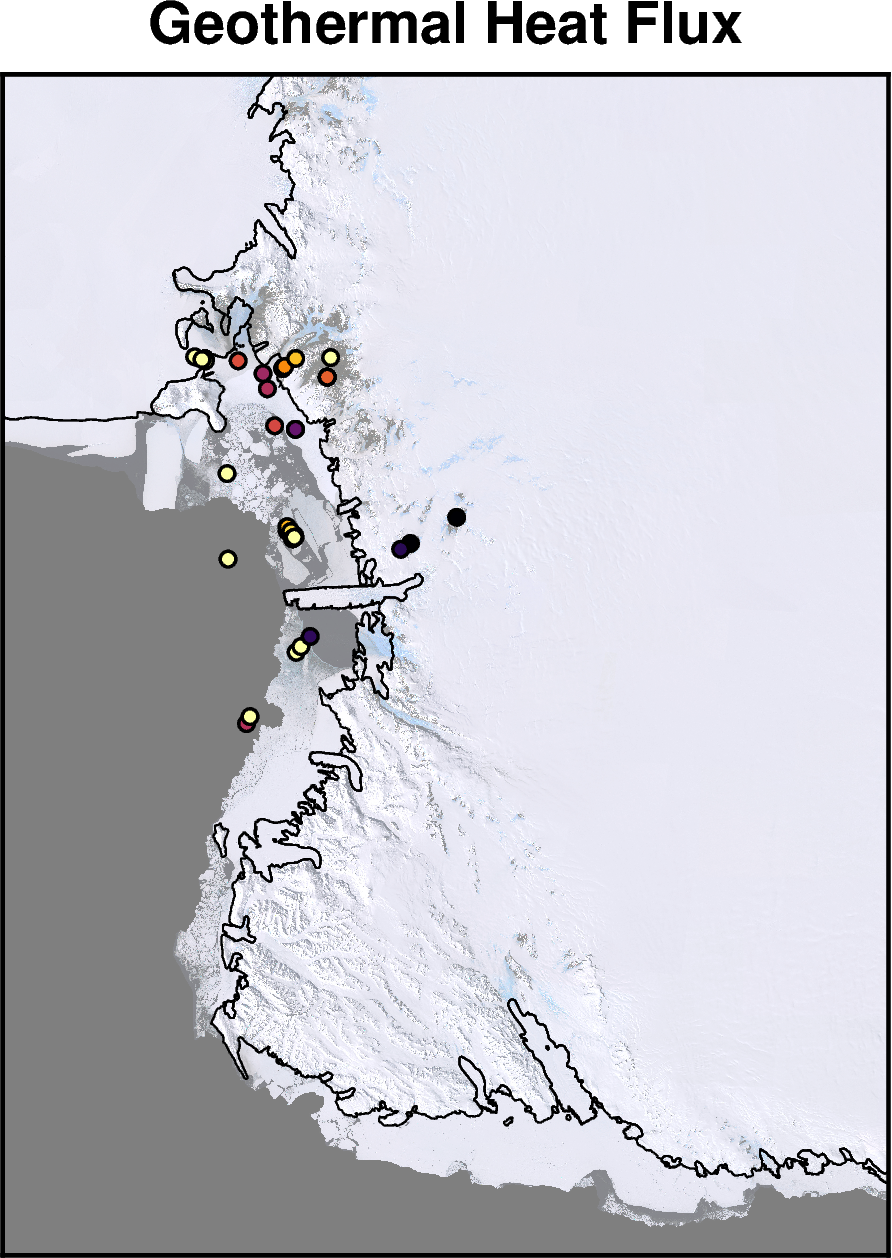

In [5]:
# make basemap with polartoolkit
fig = maps.basemap(
    region=regions.victoria_land,
    title="Geothermal Heat Flux",
    imagery_basemap=True,
    transparency=50,
    coast=True,
    hemisphere="south",
)

# add figure elements on top with pygmt `plot` method
fig.plot(
    x=df.x,
    y=df.y,
    style="c.2c",
    fill=df.GHF,
    pen="1p,black",
    cmap="ghf.cpt",
)

fig.show(dpi=200)

In [6]:
# delete the ghf.cpt file
import pathlib

pathlib.Path.unlink("ghf.cpt")

For more info on how to integrate PolarToolkit with PyGMT, see [this how-to guide](../how_to/use_with_pygmt.ipynb)